<h1 style='color:#15284C; font-size:30px'><center>Project Thesis - First Internship</center></h1>

<h3 style='color:#15284C;'> Import Dependencies </h3>

In [1]:
#array ,linear algebra, fourier transform, and matrices.
import numpy as np
# merging, reshaping, selecting, as well as data cleaning, and data wrangling features.
import pandas as pd
#data visulization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
#importing databse
import sqlite3

#regular expression
import re
%matplotlib inline 

#natural language processing library
import nltk

#lemmatization
from nltk.stem import WordNetLemmatizer
#stemming
from nltk.stem import PorterStemmer
#word tokenization
from nltk import word_tokenize
#sentence tokenization
from nltk import sent_tokenize

#part of speect tagging
from nltk import pos_tag

#remove stop word in english
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
#library to remove punctuation

#string
import string

#Sentiment Analysis 
from textblob import TextBlob

#emojiii
import emoji
#box plot in feedback analysis
import plotly.express as px

<h3 style='color:#15284C;'>Load Dataset</h3>

In [2]:
#read dataset
data = pd.read_csv('dataset/last_update_dataset.csv')

In [3]:
#set full display all features
pd.set_option('display.max_columns', None)
list(data.columns)

['Timestamp',
 'Username',
 'I agree',
 'Gender',
 'Age',
 'Phone Number / Tel',
 'Your Major ',
 'Education Levels',
 'University/Institution',
 'Your Current Locality When Studying Online Learning',
 'Feedback on online/distance learning (During COVID-19)',
 'Emotional of online/distance learning (During COVID-19)',
 'Telegram',
 'Email Address',
 'Messenger',
 'University Messenger',
 'Other Digital Communication Tools ',
 'Google Meet',
 'Zoom',
 'Microsoft Team',
 'Google Classroom',
 'Other Online Management Platforms',
 'I have highly attended school works.',
 'On average, How much time do you spend per day on online learning? ',
 'I prefer to study online more than the physical class',
 'I have been feeling stressed since I started studying online.',
 'During the online learning, I was received more confidence in solving personal problems.',
 'Communication with classmates and teachers during online learning',
 'I can ask the teacher for help quickly when I have a problem.',
 '

<h3 style='color:#15284C;'>Exploratory Data Analysis - EDA</h3>

In [4]:
#rename the columns
data.rename(columns={
    'Timestamp':'time_stamp',
    'Username':'user_name',
    'I agree':'terms_conditions',
    'Gender':'gender',
    'Age':'age',
    'Phone Number / Tel':'tel',
    'Your Major ':'major',
    'Education Levels':'education_levels',
    'University/Institution':'university',
    'Your Current Locality When Studying Online Learning':'local',
    'Feedback on online/distance learning (During COVID-19)':'feedback',
    'Emotional of online/distance learning (During COVID-19)':'emotion',
    'Telegram':'telegram',
    'Email Address':'email_address',
     'Messenger':'messenger',
     'University Messenger':'university_messenger',
     'Other Digital Communication Tools ':'other_com_tools',
     'Google Meet':'google_meet',
     'Zoom':'zoom',
     'Microsoft Team':'microsoft_team',
     'Google Classroom':'google_classroom',
     'Other Online Management Platforms':'other_manage_tools',
     'I have highly attended school works.':'school_works',
     'On average, How much time do you spend per day on online learning? ':'learning_time',
     'I prefer to study online more than the physical class':'online_physical_class',
     'I have been feeling stressed since I started studying online.':'feeling_stress',
     'During the online learning, I was received more confidence in solving personal problems.':'solving_problem',
     'Communication with classmates and teachers during online learning':'communication',
     'I can ask the teacher for help quickly when I have a problem.':'asking_teacher',
     'I get more difficulties during online learning':'get_difficulties',
     'I meet difficulties during online learning':'difficulties',
     'My daily online learning process is working smoothly':'online_learning_smoothly',
     'What are you mostly using digital devices with online learning?':'digital_devices',
     'On average, how much have you paid per month on wifi or hotspot?':'internet_payment',
     'I encountered/meet technical difficulties while studying online.':'met_tech_difficulties',
     'Online learning can completely replace hands-on classroom learning, even if COVID-19 status is terminated.':'online_replace_offline',
     'I prefer to study face-to-face class (offline class)':'prefer_face_to_face',
     'I prefer to study online class':'prefer_online_class',
     'I prefer to study online and offline class':'prefer_both'
    }, inplace=True)

In [5]:
#check the data types
data.dtypes

time_stamp                  object
user_name                   object
terms_conditions            object
gender                      object
age                         object
tel                         object
major                       object
education_levels            object
university                  object
local                       object
feedback                    object
emotion                     object
telegram                     int64
email_address                int64
messenger                    int64
university_messenger         int64
other_com_tools             object
google_meet                  int64
zoom                         int64
microsoft_team               int64
google_classroom             int64
other_manage_tools          object
school_works                object
learning_time               object
online_physical_class       object
feeling_stress              object
solving_problem             object
communication               object
asking_teacher      

In [6]:
#check the features info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   time_stamp                503 non-null    object
 1   user_name                 503 non-null    object
 2   terms_conditions          503 non-null    object
 3   gender                    503 non-null    object
 4   age                       503 non-null    object
 5   tel                       460 non-null    object
 6   major                     503 non-null    object
 7   education_levels          503 non-null    object
 8   university                503 non-null    object
 9   local                     503 non-null    object
 10  feedback                  496 non-null    object
 11  emotion                   503 non-null    object
 12  telegram                  503 non-null    int64 
 13  email_address             503 non-null    int64 
 14  messenger                 

In [7]:
#check the dataset null or not
data.isnull().any()

time_stamp                  False
user_name                   False
terms_conditions            False
gender                      False
age                         False
tel                          True
major                       False
education_levels            False
university                  False
local                       False
feedback                     True
emotion                     False
telegram                    False
email_address               False
messenger                   False
university_messenger        False
other_com_tools              True
google_meet                 False
zoom                        False
microsoft_team              False
google_classroom            False
other_manage_tools           True
school_works                False
learning_time               False
online_physical_class       False
feeling_stress              False
solving_problem             False
communication               False
asking_teacher              False
get_difficulti

In [8]:
#sum the dataset is null 
data.isnull().sum()

time_stamp                    0
user_name                     0
terms_conditions              0
gender                        0
age                           0
tel                          43
major                         0
education_levels              0
university                    0
local                         0
feedback                      7
emotion                       0
telegram                      0
email_address                 0
messenger                     0
university_messenger          0
other_com_tools             262
google_meet                   0
zoom                          0
microsoft_team                0
google_classroom              0
other_manage_tools          366
school_works                  0
learning_time                 0
online_physical_class         0
feeling_stress                0
solving_problem               0
communication                 0
asking_teacher                0
get_difficulties              0
difficulties                  0
online_l

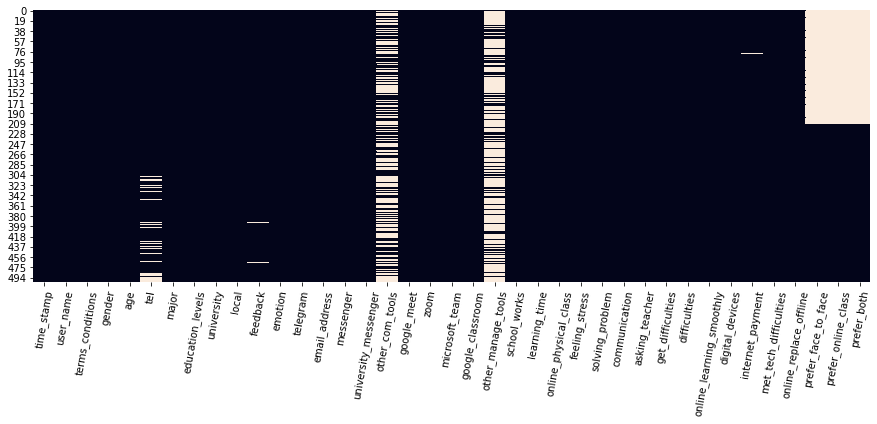

In [9]:
#check data null ft heatmap
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar=False)
plt.xticks(rotation='80')
plt.show()

In [10]:
#check duplicates values number
def check_duplicate_values(data):
    print("**"*54)
    print("Duplicated values, there are: ", data.duplicated().sum())
    print("**"*54)
    
#check duplicates values
#call above function

check_duplicate_values(data)

************************************************************************************************************
Duplicated values, there are:  0
************************************************************************************************************


In [11]:
#drop the features are not mostly helpful
data.drop(['user_name','terms_conditions','tel','other_com_tools','other_manage_tools'],
         axis=1, inplace=True)

<h3 style='color:#15284C;'>EDA - Sentiment Analysis | Student Behaviors & Feedback Analysis</h3>

In [12]:
#define a variable and copy dataset
df_sent = data.copy()

In [13]:
# Loading dictionary of smilies
def load_dict_smileys():
 
 return {
 ":-)": "smiley",
 ":)" : "smiley",
 ":D": "smiley",
 "xD": "smiley",
 ":’)" : "smiley",
 ":’D" : "smiley",
 ":3" : "smiley",
 ":]" : "smiley",
 ":^)" : "smiley",
 ":-]" : "smiley",
 ":-3" : "smiley",
 ":->" : "smiley",
 ":))" : "smiley",
 "8-)" : "cool",
 "8)" : "cool",
 "8-D" : "cool",
 "B)" : "cool",
 "BD" : "cool",
 ":-}": "smiley",
 ":>" : "smiley",
 ":}" : "smiley",
 ":o)" : "smiley",
 ":c)" : "smiley",
 "=)" : "smiley",
 "=D" : "smiley",
 "=]" : "smiley",
 ":-D" : "smiley",
 "XD" : "smiley",
 ":o" : "surprised",
 ":O" : "surprised",
 "=o" : "surprised",
 "=O" : "surprised",
 ":0" : "surprised",
 ":(" : "sad",
 ":C" : "sad",
 ":c" : "sad",
 "=(" : "sad",
 "=c" : "sad",
 "=C" : "sad",
 ":-(" : "sad",
 ":-c" : "sad",
 ":-C" : "sad",
 ":-<" : "sad",
 ":<" : "sad",
 ":[" : "sad",
 ":{" : "sad",
 ":’(" : "crying",
 ":P" : "playful",
 ":p" : "playful",
 "xP" : "playful",
 "XP": "playful",
 "=P": "playful",
 "=p" : "playful",
 "xp": "playful",
 "xb": "playful",
 "❤": "love",
 "</3": "sad",
 ":/": "worried",
 ":-/" : "worried"
}

In [14]:
#create a function to convert text into lowercase
def convert_to_lowercase(text):
    text = text.str.lower()
    return text

cachedStopWords = stopwords.words("english")
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in cachedStopWords])
    return text


#create a function to apply word tokenization
def convert_to_word_tokens(text):
    text = text.word_tokenize(text)
    return text

#create a function to apply word tokenization
def convert_to_sentence_tokens(text):
    text = text.sent_tokenize(text)
    return text

#create a function to apply word tokenization
def convert_to_pos_tagging(text):
    text = text.pos_tag(text)
    return text

#calculate word length
def text_length_calculation(text):
    return len(text.split(' '))
    
#remove space
def remove_space(series):
    series.replace(" ", "", inplace=True)
    
            
#function to clean the word of any html-tags
def remove_html(sentence): 
    clean = re.compile('<.*?>')
    clean_text = re.sub(clean, ' ', sentence)
    return clean_text

#remove url from text
def remove_urls(text):
    url_pattern = re.compile(r'href|http.\w+')
    return url_pattern.sub(r'', text)

def remove_abbreviations(text):
    tokens = text.split(" ")
    j = 0
    for token in tokens:
        file_name = "<path to CSV file>"
        with open(file_name, "r") as fh:
            reader = csv.reader(fh)
            for row in reader:
                if row[0] == token:
                    tokens[j] = row[1]
                    fh.close()
                    j = j + 1
    return "".join(tokens)

# Removing smilies and emojis
def remove_emoticons(text):
    smilies = load_dict_smileys()
    split_tweet = text.split(" ")
    for key,val in smilies.items():
        if key in text:
            new_tweet = text.replace(key, val)
            text = new_tweet
            text = emoji.demojize(text)
            text = ' '.join(text.split())
    return text

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [15]:
#create a function to remove punctuation
def remove_punctuation(text):
    text = re.sub('\[.*?\]', '', str(text))
    text = re.sub('[%s]' % re.escape(string.punctuation),'', str(text))
    text = re.sub('\w*\d\w*', '', str(text))
    text = re.sub('[‘’“”…]', '', str(text))
    text = re.sub('\n', '', str(text))
    return text
remove_pun = lambda x: remove_punctuation(x)

In [16]:
#Converting the time frame and sorting in increasing order for easyness
df_sent["time_stamp"] = pd.to_datetime(df_sent["time_stamp"])
df_sent = df_sent.sort_values(by = "time_stamp")

In [17]:
#remove white space from series of the dataset
remove_space(df_sent.feedback)

In [18]:
#convert to lowercase
df_sent['feedback'] = convert_to_lowercase(df_sent.feedback)

In [19]:
#remove Punctuation

#********************************************************************************************************
#it spends much time to run
#********************************************************************************************************
df_sent['feedback'] = df_sent['feedback'].apply(lambda x: remove_punctuation(x))

In [20]:
#remove stopword
#It takes much time to run.
df_sent.feedback = df_sent.feedback.apply(remove_stopwords)

In [21]:
#remove smilies

#********************************************************************************************************
#it spends much time 
#********************************************************************************************************
df_sent['feedback'] = df_sent['feedback'].apply(lambda x: remove_emoticons(x))

In [22]:
#calculate review and summanry lengthd
df_sent['feedback_length']= df_sent['feedback'].apply(text_length_calculation)

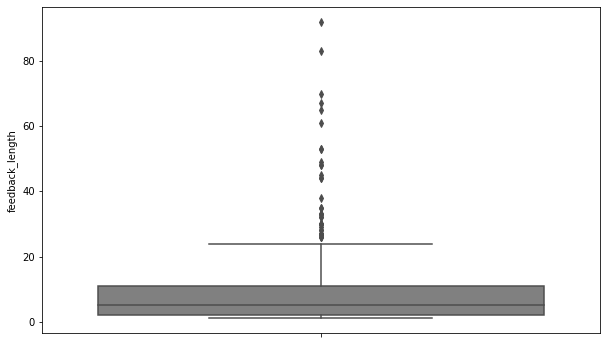

In [23]:
#check outlier of the text length
f, axes = plt.subplots(ncols=1, figsize=(10, 6))

sns.boxplot(y=df_sent['feedback_length'] ,color='grey')
plt.show()


In [24]:
#we use textblob python library to calculate the palority values of text

#call sentitment_polarity
polarity=[]
for i in df_sent['feedback']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [25]:
#insert the polarity values as a column
df_sent['polarity'] = polarity 

In [26]:
#check the sentment values
#if the polarity > 0 : Positive
#else the polarity < 0 : Negative
positive_sent = df_sent[df_sent['polarity'] >= 0]
negative_sent = df_sent[df_sent['polarity'] < 0]

In [27]:
#define the label of sentiment
df_sent['sentiment'] = df_sent['polarity'].apply(lambda x : "Negative" if x < 0 else "Positive")

In [28]:
#check the values of sentiment
print("*" * 50)
print("Positive Sentiment: ", positive_sent.shape)
print("Negative Sentiment: ", negative_sent.shape)
print("*" * 50)

**************************************************
Positive Sentiment:  (357, 36)
Negative Sentiment:  (146, 36)
**************************************************


In [29]:
#Converting the time frame and sorting in increasing order for easyness
df_sent["time_stamp"] = pd.to_datetime(df_sent["time_stamp"])
df_sent = df_sent.sort_values(by = "time_stamp")

In [30]:
#gender
df_sent.gender.replace('Prefer not to say', 'Male', inplace=True)
df_sent.gender.value_counts()

Male      266
Female    237
Name: gender, dtype: int64

In [31]:
#age
mode_age = df_sent.age.mode()
df_sent.age = df_sent.age.astype(str)
df_sent['age'] = df_sent['age'].str.replace('year','')
df_sent['age'] = df_sent['age'].str.replace('years','')
df_sent['age'] = df_sent['age'].str.replace('old','')
df_sent['age'] = df_sent['age'].str.replace('s','')
df_sent['age'] = df_sent['age'].str.replace('d','20')
df_sent['age'] = df_sent['age'].str.replace('//','20')
df_sent.age = df_sent.age.astype(int)
df_sent.age.value_counts()

20    124
19    119
21    100
18     57
22     47
23     19
17     15
24     10
26      4
31      2
30      2
25      2
28      1
16      1
Name: age, dtype: int64

In [32]:
major_dict = {'Computer Science': 'Computer Science',
 'Computer Science ':'Computer Science' ,
 'E-commerce': 'e-Commerce',
 'Computer science': 'Computer Science',
 'E-commerce ': 'e-Commerce',
 'CS': 'Computer Science',
 'E-Commerce': 'e-Commerce',
 'Telecoms and Networking': 'Telecoms and Networking',
 'Telecom and networking': 'Telecoms and Networking',
 'Telecom and Networking': 'Telecoms and Networking',
 'Computer science ': 'Computer Science',
 'computer science': 'Computer Science',
 'IT': 'Information Technology',
 'Telecom and networking ': 'Telecoms and Networking',
 'Finance and Accounting': 'Finance and Accounting',
 'accounting': 'Finance and Accounting',
 'cs': 'Computer Science',
 'E-Commerce ': 'e-Commerce',
 'Architecture ': 'Architecture',
 'e-Commerce': 'e-Commerce',
 'e-commerce': 'e-Commerce',
 'Accounting': 'Finance and Accounting',
 'E-COMMERCE': 'e-Commerce',
 'Mathematics': 'Mathematics',
 'International Business Management': 'International Business Management',
 'Geography': 'Geography',
 'telecoms and Networking ': 'Telecoms and Networking',
 'Telecoms and Neworking': 'Telecoms and Networking',
 'TN': 'Telecoms and Networking',
 'bachelor of e-Commerce ': 'e-Commerce',
 "I'm still a STEM high school student.": 'STEM',
 'Information Technology and Communication': 'Information Technology',
 'Graphic Design ': 'Graphic Design',
 'Indonesia language ': 'Indonesia Language',
 'Data Science': 'Data Science',
 'Management of information systems ': 'Management of Information System',
 'E-com': 'e-Commerce',
 'E commerce ': 'e-Commerce',
 'telecom and networking': 'Telecoms and Networking',
 'Telecom ans Networking': 'Telecoms and Networking',
 'Media and Communications': 'Media and Communication',
 'Informatic ': 'Informatic',
 'computer  science': 'Computer Science',
 'Telecommunications and networking': 'Telecoms and Networking',
 'English Literature ': 'English Liturature',
 'Civil Engineering': 'Civil Engineering',
 'telecom and networking ': 'Telecoms and Networking',
 'E_Commrece': 'e-Commerce',
 'Telecom and Network ': 'Telecoms and Networking',
 'E- Commerce': 'e-Commerce',
 'High school students': 'Computer Science',
 'Software develop ': 'Computer Science',
 'E commerce': 'e-Commerce',
 'Backend Developer': 'Computer Science',
 'It': 'Information Technology',
 'Telecom and Networking ': 'Telecoms and Networking',
 'computer science ': 'Computer Science',
 'Telecoms and Networking ': 'Telecoms and Networking',
 'Telecoms & Networking ': 'Telecoms and Networking',
 'Edu': 'Education',
 'Foundation year student': 'Computer Science',
 'Comuter Science': 'Computer Science',
 'Telecoms and networking ': 'Telecoms and Networking',
 'CSq': 'Computer Science',
 'Media and Communication': 'Media and Communication',
 'English': 'English Liturature',
 'mechanical engineering': 'Mechanical Engineering',
 'Ecommerce': 'e-Commerce',
 'Architecture': 'Architecture',
 'Telecommunications and Networking': 'Telecoms and Networking',
 'E-Comers': 'e-Commerce',
 'food engineering': 'Food Engineering',
 'Chemistry ': 'Chemistry',
 'Telecom and network ': 'Telecoms and Networking',
 'MIS': 'Management of Information System',
 'International Studies': 'International Relations',
 'Engineering': 'Engineering',
 'Study management': 'Management',
 'Entrepreneurship and innovation': 'Global Entrepreneurship and Innovation',
 'Accounting ': 'Finance and Accounting',
 'e Commerce': 'e-Commerce',
 'ICT': 'Information Technology',
 'Management of Information Systems': 'Management of Information System',
 'Information Technology': 'Information Technology',
 'Global entrepreneurship and innovation ': 'Global Entrepreneurship and Innovation',
 'IR': 'International Relations',
 'Global entrepreneurship and innovation': 'Global Entrepreneurship and Innovation',
 'student': 'Computer Science',
 'International relations': 'International Relations',
 'Law': 'Law',
 'International relations ': 'International Relations',
 'Management of Information System': 'Management of Information System',
 'Management information system ': 'Management of Information System',
 'Architectural design ': 'Architectural Design',
 'Médecin ':'Medicine'}

#replace the student major
df_sent.major.replace(major_dict, inplace=True)
df_sent.major.value_counts()

Computer Science                              206
Finance and Accounting                         69
e-Commerce                                     55
Telecoms and Networking                        34
Mathematics                                    27
International Relations                        17
Civil Engineering                              16
Economics                                       9
Information Technology                          9
Business                                        7
Management of Information System                5
English Liturature                              4
Global Entrepreneurship and Innovation          3
Architecture                                    3
Statistics                                      3
Media and Communication                         2
Law & Jurisprudence                             2
Management                                      2
Medicine                                        2
Information and Communication Engineering       1


In [33]:
df_sent.education_levels = df_sent.education_levels.astype(str)
df_sent['education_levels'] = df_sent['education_levels'].str.replace('engineer degree',"Bachelor's Degree")
df_sent['education_levels'] = df_sent['education_levels'].str.replace("Bachelor's Degree ","Bachelor's Degree")
df_sent['education_levels'] = df_sent['education_levels'].str.replace('1st year student in accounting and finance',"Bachelor's Degree")
df_sent['education_levels'] = df_sent['education_levels'].str.replace('Undergraduate',"Bachelor's Degree")
df_sent['education_levels'] = df_sent['education_levels'].str.replace('Student',"Bachelor's Degree")
df_sent['education_levels'] = df_sent['education_levels'].str.replace('High school',"Bachelor's Degree")
df_sent['education_levels'] = df_sent['education_levels'].str.replace('High School',"Bachelor's Degree")
df_sent['education_levels'] = df_sent['education_levels'].str.replace('High School ',"Bachelor's Degree")
df_sent['education_levels'] = df_sent['education_levels'].str.replace('Short course',"Bachelor's Degree")
df_sent['education_levels'] = df_sent['education_levels'].str.replace("Bachelor's Degree ","Bachelor's Degree")
df_sent['education_levels'] = df_sent['education_levels'].str.replace('University health and science',"Bachelor's Degree")
df_sent['education_levels'] = df_sent['education_levels'].str.replace('No',"Associate's Degree")
dict(df_sent.education_levels.value_counts())

{"Bachelor's Degree": 473,
 "Associate's Degree": 19,
 "Master's Degree": 10,
 "Bachelor's Degree ": 1}

In [34]:
avg_learning_hours = {'3h': '3h-6h',
 '3h-6h': '3h-6h',
 '6h': '3h-6h',
 '4h': '3h-6h',
 '8h': '6h-9h',
 '5h': '3h-6h',
 '2h': '1h-3h',
 '7h': '6h-9h',
 '6h-9h': '6h-9h',
 '1h-3h': '1h-3h',
 '4': '3h-6h',
 '5': '3h-6h',
 '3': '3h-6h',
 '1h': '1h-3h',
 '6': '3h-6h',
 '5-6h': '3h-6h',
 '4h-6h':'3h-6h',
 '4-5h': '3h-6h',
 '3h ': '3h-6h',
 'more than 10h': 'more than 10h',
 '2-3h': '1h-3h',
 '8h ': '6h-9h',
 '3h sometimes 6h': '3h-6h',
 '7h, 8h': '6h-9h',
 '1hour': '1h-3h',
 '2h - 4h': '3h-6h',
 '6 hours': '3h-6h',
 '3-4 hourse': '3h-6h',
 '10h/Only Wednesday  ': '3h-6h',
 '7h50mn': '6h-9h',
 'it was 6h': '3h-6h',
 '4-5 hours': '3h-6h',
 '6-8 per day': '6h-9h',
 '2h+': '3h-6h',
 'depend on my schedule so I guess 3h  ': '3h-6h',
 'around 5 hours per day ': '3h-6h',
 '4-8 h ': '6h-9h',
 '3hr': '3h-6h',
 'Mostly, i spent around 5 hours. ': '3h-6h',
 '10h ': '6h-9h',
 'Around to 4-7 hour per day': '3h-6h',
 'Around 7h': '6h-9h',
 '2 to 4 hours': '3h-6h',
 'May be 4to 5 hours a day on average': '3h-6h',
 '4h to 5h': '3h-6h',
 'As school schedule , 3 to 4 hours': '3h-6h',
 '2h ': '1h-3h',
 '6h  ': '3h-6h',
 '3-4h': '3h-6h',
 '4-6 hours': '3h-6h',
 '4h 30mn': '3h-6h',
 "If it's school program it's proximately at least 7-8h per day.": '6h-9h',
 '3h ,4h': '3h-6h',
 'Up to 5 hour': '3h-6h',
 '3 hours': '3h-6h',
 '1-2 h': '1h-3h',
 '4h average': '3h-6h',
 'On board 3h per day': '3h-6h',
 'About 8h': '6h-9h',
 'I think 4-5 hr is average.': '3h-6h',
 'maximum 6h': '3h-6h',
 '4-6 h': '3h-6h',
 '.': '3h-6h',
 '5 hours': '3h-6h',
 '14': 'more than 10h',
 '2h30m': '1h-3h',
 '3H': '3h-6h',
 'From 2hours to 4 hours  depend on my schedule. ': '3h-6h',
 '2-3h per day': '3h-6h',
 '3h Or 4h ': '3h-6h',
 '3h a day ': '3h-6h',
 'On average would be around 3-5 hours per day.': '3h-6h',
 '0h': '1h-3h',
 'At least 2 hours… ': '3h-6h',
 '10h': 'more than 10h',
 '12h': 'more than 10h',
 '5h - 8h': '6h-9h',
 '2.30 h': '3h-6h',
 'sure': '3h-6h',
 '6hours': '3h-6h',
 'According to school assign': '3h-6h',
 '4h per day': '3h-6h',
 '6hours per day': '3h-6h',
 'More than 5h': '3h-6h'
}

#replace the student major
df_sent.learning_time.replace(avg_learning_hours, inplace=True)
df_sent.learning_time.value_counts()

3h-6h            291
6h-9h            102
1h-3h             88
more than 10h     22
Name: learning_time, dtype: int64

In [35]:
avg_internet_payment = {'15$': '1$-15$',
 '10$': '1$-15$',
 '20$': '15$-40$',
 '15$-40$': '15$-40$',
 '1$-15$': '1$-15$',
 '15': '1$-15$',
 '12$': '1$-15$',
 '16$': '15$-40$',
 '25$': '15$-40$',
 '12': '1$-15$',
 '18$': '15$-40$',
 '30$': '15$-40$',
 '6$': '1$-15$',
 '8$': '1$-15$',
 '13$': '1$-15$',
 '19$': '15$-40$',
 '5$': '1$-15$',
 '10': '1$-15$',
 '10$-15$': '1$-15$',
 'I don’t really know because I use my home’s WiFi.': '1$-15$',
 '10$-13$': '1$-15$',
 '8$ ( hotspot )': '1$-15$',
 '16$ for wifi 4$ for smart phone': '1$-15$',
 '18$ Wifi, 4$ Hotspot': '15$-40$',
 '$30': '15$-40$',
 '23': '15$-40$',
 '50$': '40$-60$',
 '16$ for WiFi ': '15$-40$',
 '70$': '60$-100$',
 '17$': '15$-40$',
 '36$  (use by many people )': '15$-40$',
 '10dollars': '1$-15$',
 '15 $': '1$-15$',
 'Around 8$ on hotspot': '1$-15$',
 'I use wifi pay 80$ per month ': '60$-100$',
 "I am a mama's boy, so my mom paid it for me:))": '1$-15$',
 'maybe 10$ on average': '1$-15$',
 '40$-60$': '40$-60$',
 '1$ in 2 day cos i share personal hotspot to my computer': '1$-15$',
 '50$+': '40$-60$',
 '16': '15$-40$',
 '15$ per week.': '40$-60$',
 '20': '15$-40$',
 'wifi 15$': '1$-15$',
 'none since i dont pay for wifi': '1$-15$',
 'Free ': '1$-15$',
 '15$ for wifi monthly': '1$-15$',
 '0$ ': '1$-15$',
 '$12': '1$-15$',
 '15-20$ ': '15$-40$',
 '.': '1$-15$',
 '15$ for wifi ': '1$-15$',
 '23$': '15$-40$',
 '15$ on wifi ': '1$-15$',
 '30': '15$-40$',
 '20$ Per month ': '15$-40$',
 '15$ ': '1$-15$',
 'No idea': '1$-15$',
 'around 15$-20$': '15$-40$',
 '17$/month on WiFi ': '15$-40$',
 '7$': '1$-15$',
 '2$ per week': '1$-15$',
 '20-30$': '15$-40$',
 '24$': '15$-40$',
 'Sometime $10 - $20 for doing some project and research. Normally $6 - $8.': '1$-15$',
 '60$-100$': '60$-100$'}

#replace the student major
df_sent.internet_payment.replace(avg_internet_payment, inplace=True)
df_sent.internet_payment.value_counts()

1$-15$            250
15$-40$           215
40$-60$            21
60$-100$           12
more than 100$      4
Name: internet_payment, dtype: int64

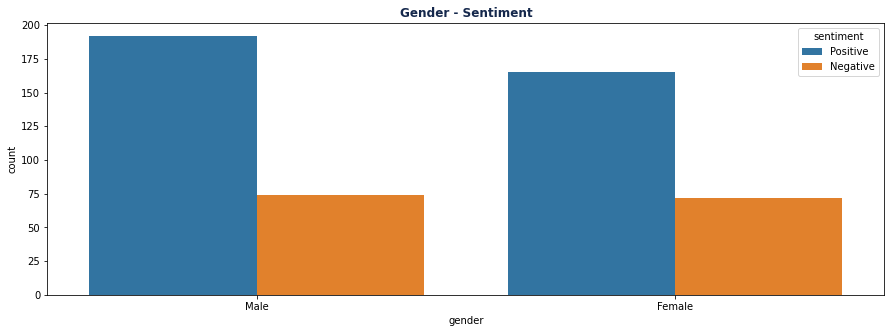

In [53]:
#How many percentages of students' gender enjoy online learning?

plt.figure(figsize=(15,5))
sns.countplot(x='gender',hue='sentiment', data=df_sent)
plt.title('Gender - Sentiment', fontweight='bold', color='#15284C')
plt.xticks(rotation='0')
plt.show()

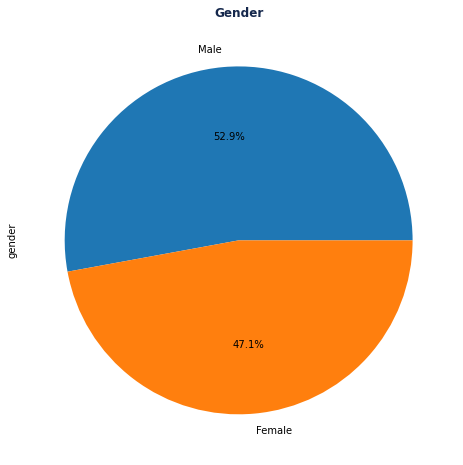

In [37]:
plt.figure(figsize=(8,8))
df_sent['gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender', fontweight='bold', color='#15284C')
plt.show()

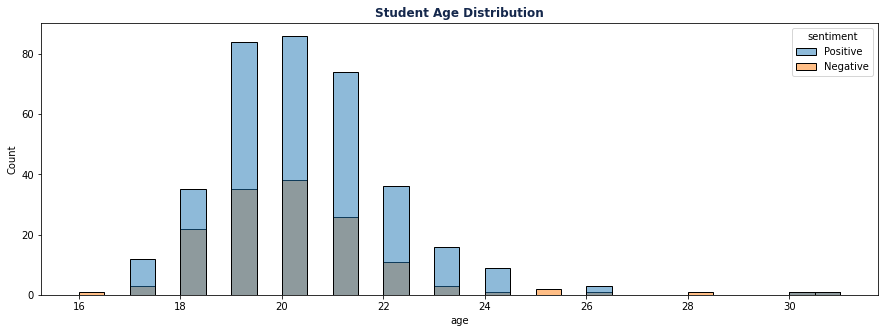

Min age:  16
Avg age:  20.18489065606362
Max age:  31


In [38]:
plt.figure(figsize=(15,5))
sns.histplot(x='age', hue='sentiment',data=df_sent)
plt.title("Student Age Distribution", color='#15284C', fontweight='bold')
plt.show()
print("Min age: " ,df_sent.age.min())
print("Avg age: " ,df_sent.age.mean())
print("Max age: " ,df_sent.age.max())

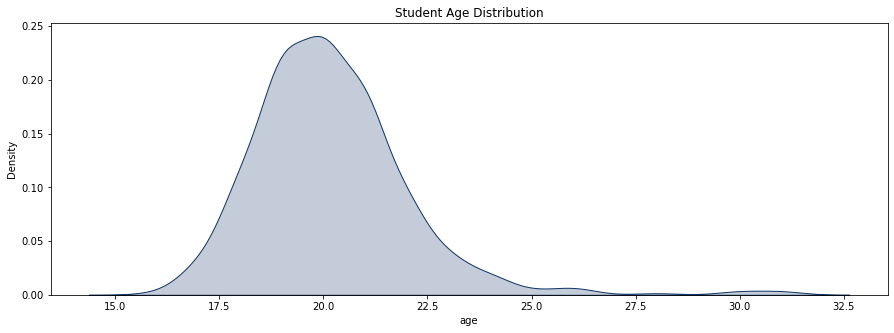

In [39]:
plt.figure(figsize=(15,5))
p1=sns.kdeplot(df_sent['age'], shade=True, color="#113464").set_title('Student Age Distribution')

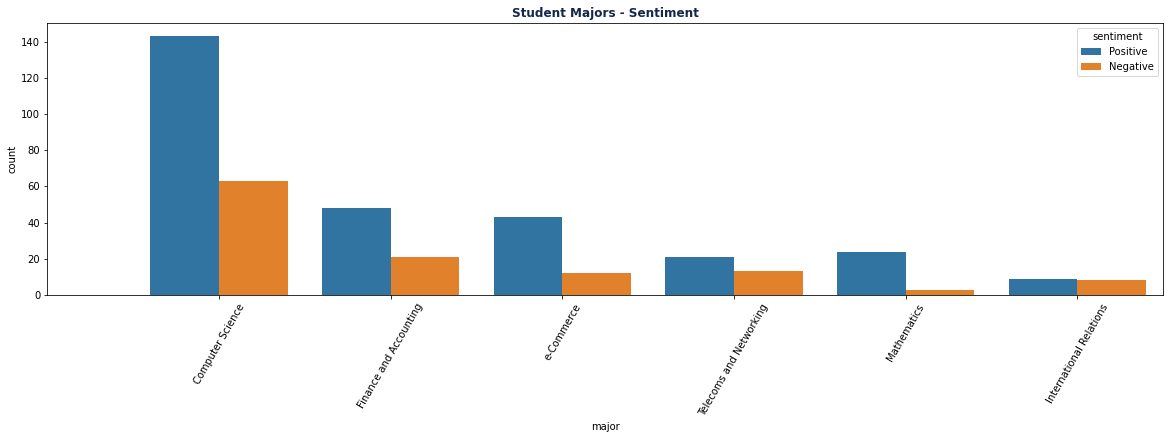

In [40]:
#What are major and education levels feeling stressed on online learning?

plt.figure(figsize=(20,5))
sns.countplot(x='major',hue='sentiment', data=df_sent, order = df_sent['major'].value_counts().index)
plt.title('Student Majors - Sentiment', fontweight='bold', color='#15284C')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()

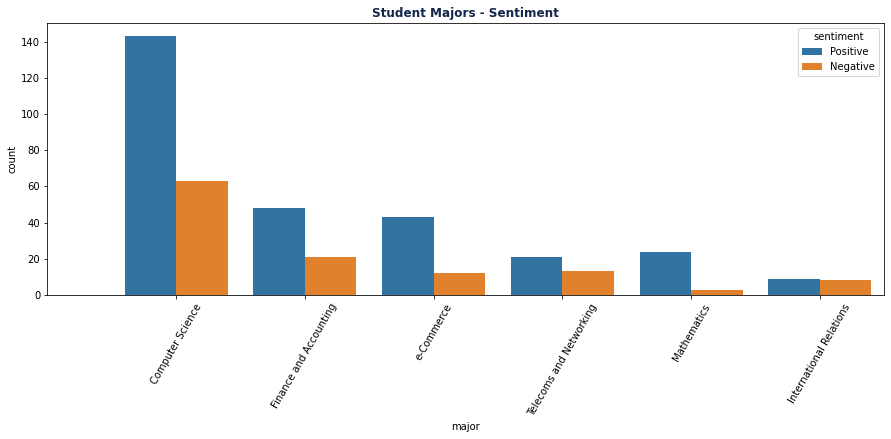

In [54]:
#What are major and education levels feeling stressed on online learning?

plt.figure(figsize=(15,5))
sns.countplot(x='major',hue='sentiment', data=df_sent, order = df_sent['major'].value_counts().index)
plt.title('Student Majors - Sentiment', fontweight='bold', color='#15284C')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()

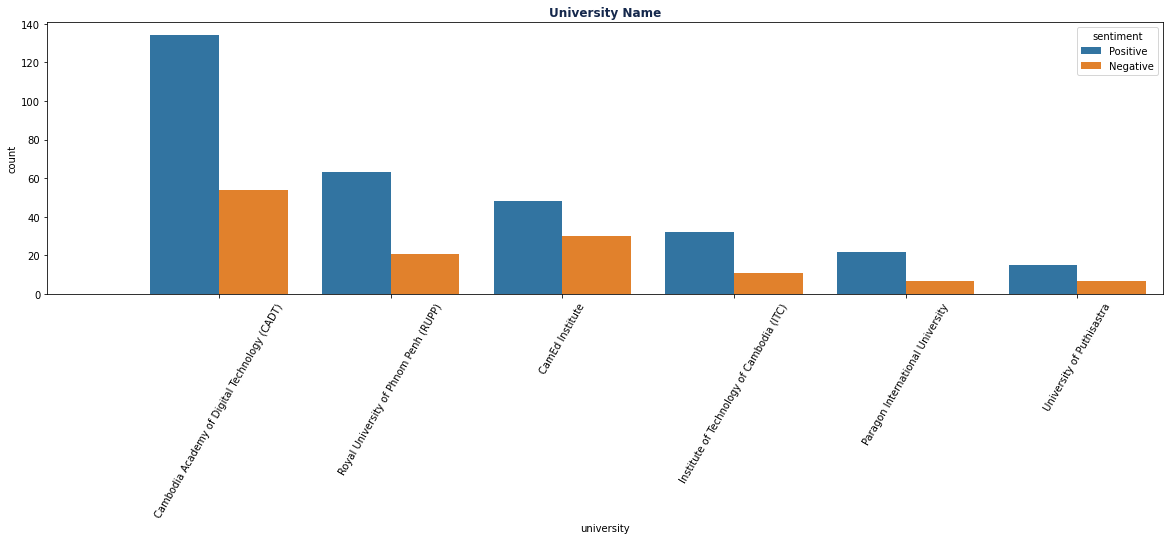

In [42]:
plt.figure(figsize=(20,5))
sns.countplot(x='university',hue='sentiment', data=df_sent, order = df_sent['university'].value_counts().index)
plt.title('University Name', fontweight='bold', color='#15284C')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()

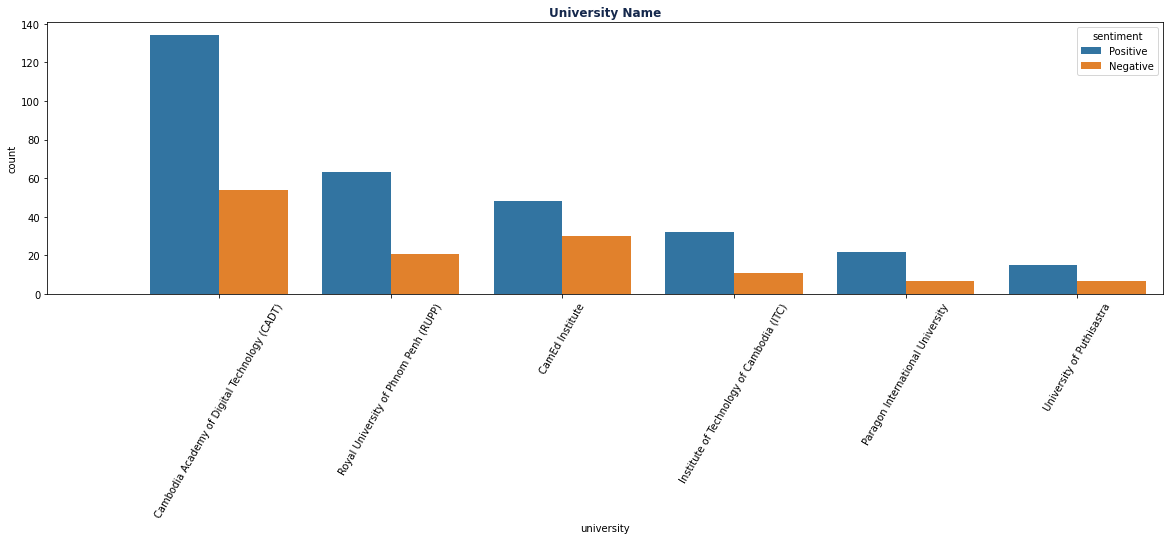

In [43]:
plt.figure(figsize=(20,5))
sns.countplot(x='university',hue='sentiment', data=df_sent, order = df_sent['university'].value_counts().index)
plt.title('University Name', fontweight='bold', color='#15284C')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()

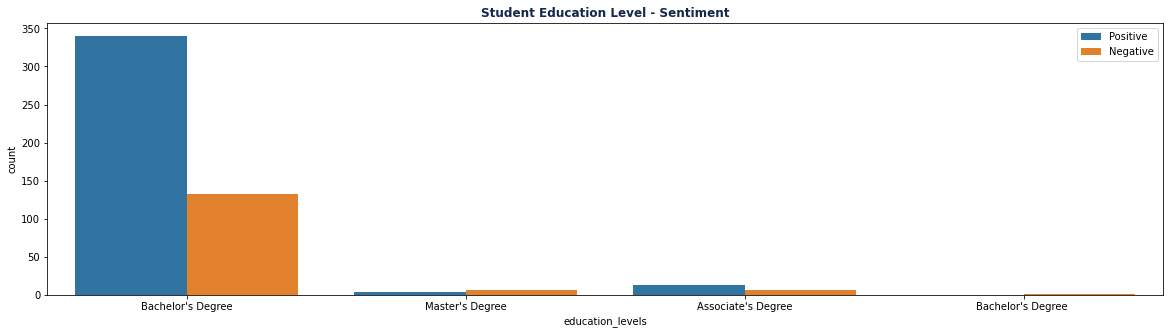

In [44]:
#What are major and education levels feeling stressed on online learning?

plt.figure(figsize=(20,5))
sns.countplot(x='education_levels',hue='sentiment', data=df_sent)
plt.title('Student Education Level - Sentiment', fontweight='bold', color='#15284C')
plt.xticks(rotation='0')
plt.legend(loc='upper right')
plt.show()

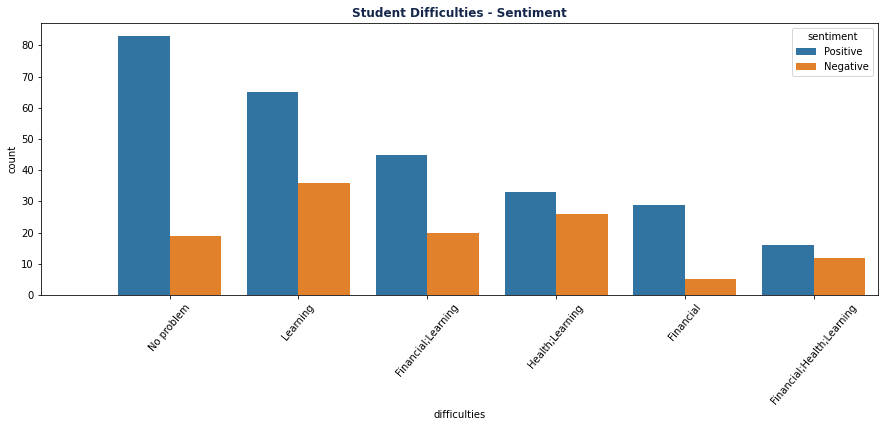

In [55]:
plt.figure(figsize=(15,5))
sns.countplot(x='difficulties',hue='sentiment', data=df_sent, order = df_sent['difficulties'].value_counts().index)
plt.title('Student Difficulties - Sentiment', fontweight='bold', color='#15284C')
plt.xticks(rotation='50')
plt.xlim(-1,5.5)
plt.show()

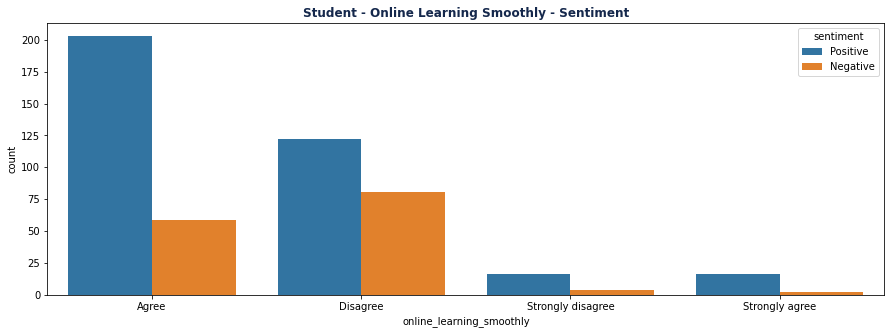

In [57]:
plt.figure(figsize=(15,5))
sns.countplot(x='online_learning_smoothly',hue='sentiment', data=df_sent, 
              order = df_sent['online_learning_smoothly'].value_counts().index)
plt.title('Student - Online Learning Smoothly - Sentiment', fontweight='bold', color='#15284C')
plt.xticks(rotation='0')
#plt.xlim(-1,5.5)
plt.show()

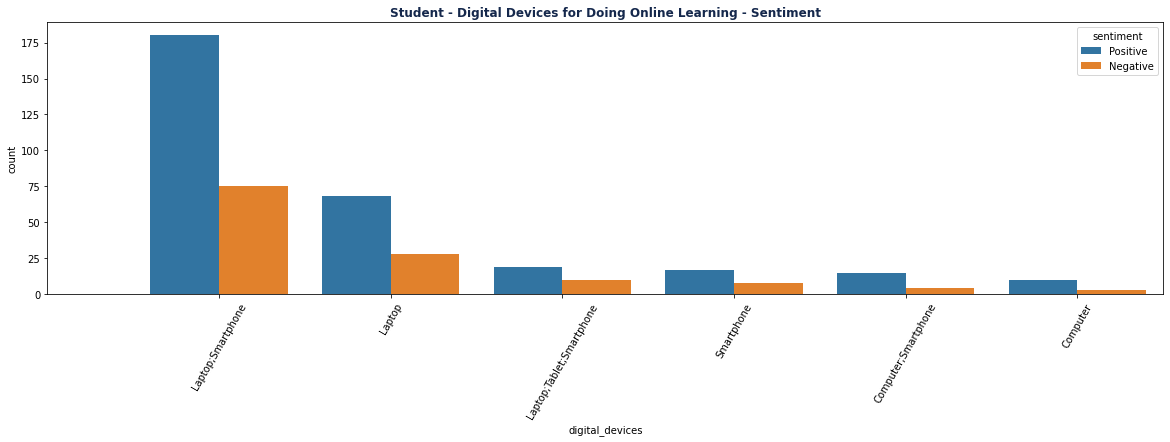

In [47]:
plt.figure(figsize=(20,5))
sns.countplot(x='digital_devices',hue='sentiment', data=df_sent,
             order = df_sent['digital_devices'].value_counts().index)
plt.title('Student - Digital Devices for Doing Online Learning - Sentiment', fontweight='bold', color='#15284C')
plt.xticks(rotation='60')
plt.xlim(-1,5.5)
plt.show()

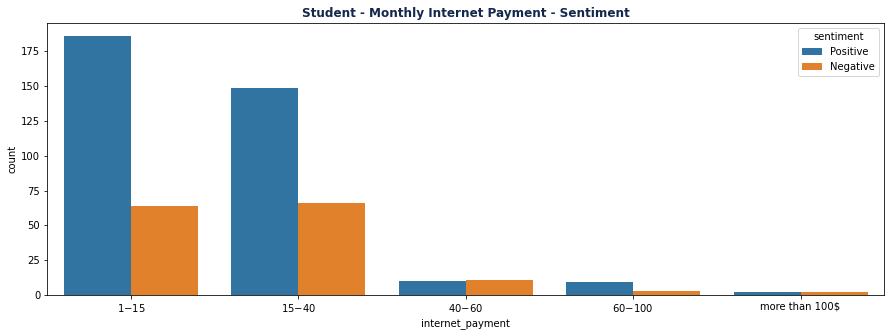

In [58]:
plt.figure(figsize=(15,5))
sns.countplot(x='internet_payment', hue='sentiment', data=df_sent,
             order = df_sent['internet_payment'].value_counts().index)
plt.title('Student - Monthly Internet Payment - Sentiment', fontweight='bold', color='#15284C')
plt.xticks(rotation='0')
plt.show()

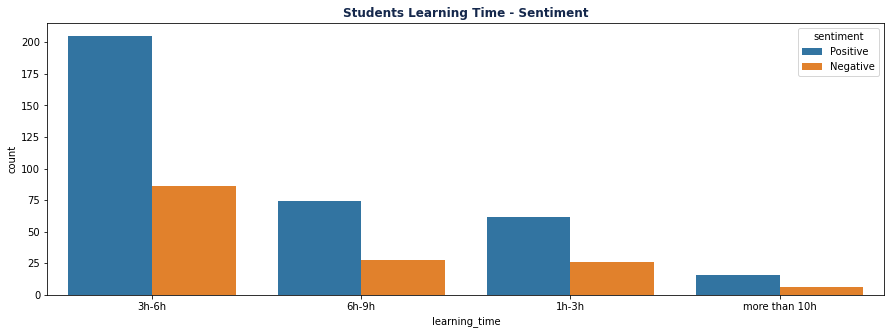

In [59]:
plt.figure(figsize=(15,5))
sns.countplot(x='learning_time',hue='sentiment', data=df_sent,
             order = df_sent['learning_time'].value_counts().index)
plt.title('Students Learning Time - Sentiment', fontweight='bold', color='#15284C')
plt.xticks(rotation='0')
plt.show()

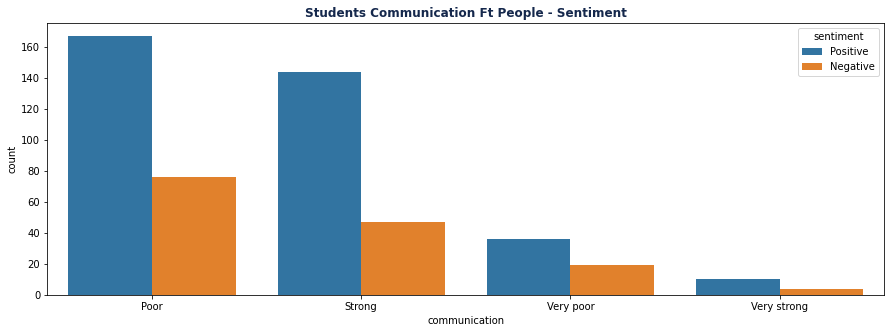

In [60]:
plt.figure(figsize=(15,5))
sns.countplot(x='communication', hue='sentiment', data=df_sent,
             order = df_sent['communication'].value_counts().index)
plt.title('Students Communication Ft People - Sentiment', fontweight='bold', color='#15284C')
plt.xticks(rotation='0')
plt.show()

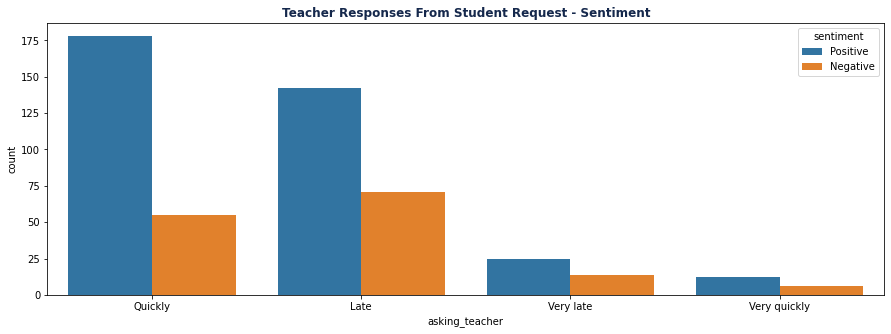

In [61]:
plt.figure(figsize=(15,5))
sns.countplot(x='asking_teacher', hue='sentiment', data=df_sent,
             order = df_sent['asking_teacher'].value_counts().index)
plt.title('Teacher Responses From Student Request - Sentiment', fontweight='bold', color='#15284C')
plt.xticks(rotation='0')
plt.show()

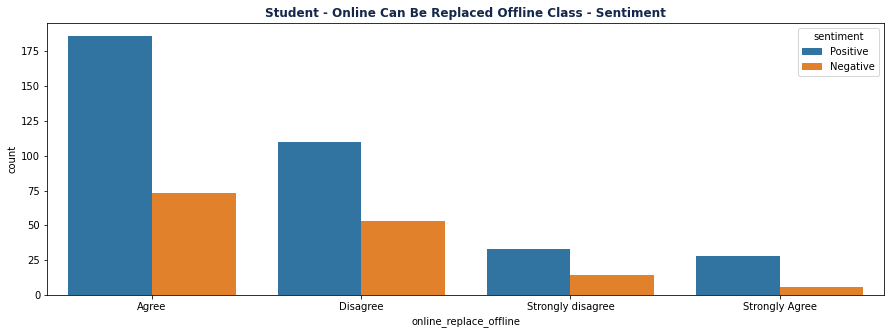

In [62]:
plt.figure(figsize=(15,5))
sns.countplot(x='online_replace_offline',hue='sentiment' ,data=df_sent,
             order = df_sent['online_replace_offline'].value_counts().index)
plt.title('Student - Online Can Be Replaced Offline Class - Sentiment', fontweight='bold', color='#15284C')
plt.xticks(rotation='0')
plt.show()